# Histogram Equalization

You can see histogram lies in brighter region. 
We need the full spectrum. For that, we need a transformation function which maps the input pixels in brighter region to output pixels in full region. 
That is what histogram equalization does.



In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('garuda-pancasila-logo-download-png-files-logo-11.png',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

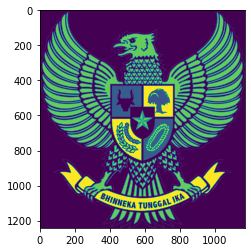

In [2]:
plt.imshow(img)

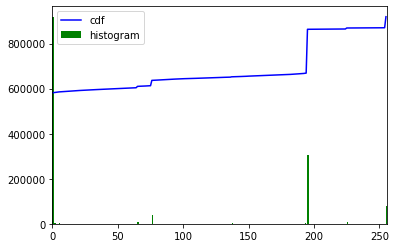

In [3]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'g')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


Now we find the minimum histogram value (excluding 0) and apply the histogram equalization equation as given in wiki page. 
But I have used here, the masked array concept array from Numpy. 
For masked array, all operations are performed on non-masked elements. 
You can read more about it from Numpy docs on masked arrays.

In [5]:
img = cv2.imread('garuda-pancasila-logo-download-png-files-logo-11.png',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

Now we have the look-up table that gives us the information on what is the output pixel value for every input pixel value. 
So we just apply the transform.

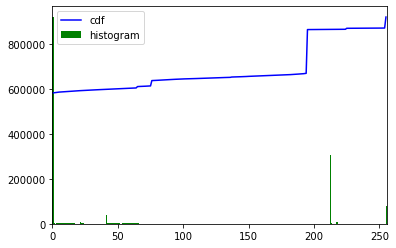

In [6]:
img2 = cdf[img]
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'g')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


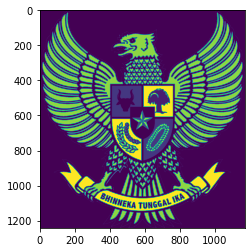

In [7]:
plt.imshow(img2)